In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
# get column name and type
inspector = sqlalchemy.inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_result = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "06").all()
june_result

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [8]:
#  3. Convert the June temperatures to a list.
june_result = list(june_result)
june_result

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [9]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_result, columns=['Date','June Temperture'])
june_df.head()

,Date,June Temperture
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperture
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_result = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == "12").all()
dec_result

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 7. Convert the December temperatures to a list.
dec_result = list(dec_result)
dec_result

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_result, columns=['Date','Dec Temperture'])
dec_df.head()

,Date,Dec Temperture
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Dec Temperture
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Summary for more queries

In [15]:
session.query(func.avg(Measurement.prcp),func.avg(Measurement.tobs)).\
filter((Measurement.station == 'USC00519281'),(func.strftime("%m", Measurement.date) == '06')).all()

[(0.15152542372881356, 73.27118644067797)]

In [16]:
# Get average June precipitation(prcp) and June temperture of each station.
# Get min and max temp in June for each station.
june_more = session.query(Measurement.station, func.avg(Measurement.prcp), func.avg(Measurement.tobs), 
                          func.min(Measurement.tobs),func.max(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

# june_more = session.query(Measurement.station, Measurement.prcp, Measurement.tobs, Measurement.date).\
#     filter(func.strftime("%m", Measurement.date) == "06").\
#     order_by(Measurement.station).all()

june_more

[('USC00511918', 0.015157232704402513, 74.13939393939394, 66.0, 85.0),
 ('USC00513117', 0.11824786324786322, 74.05084745762711, 68.0, 83.0),
 ('USC00514830', 0.11419161676646702, 76.00537634408602, 67.0, 81.0),
 ('USC00516128', 0.4957476635514022, 71.9372197309417, 66.0, 79.0),
 ('USC00517948', 0.057974683544303796, 76.6554054054054, 64.0, 82.0),
 ('USC00518838', 0.09461538461538463, 73.39473684210526, 67.0, 78.0),
 ('USC00519281', 0.15152542372881356, 73.27118644067797, 65.0, 82.0),
 ('USC00519397', 0.022660944206008553, 77.55932203389831, 70.0, 84.0),
 ('USC00519523', 0.05004424778761062, 76.66810344827586, 71.0, 82.0)]

In [17]:
june_more_df = pd.DataFrame(june_more, columns=['Station', 'June Prcp', 'June Avg Temp', 'June Min Temp', 'June Max Temp'])
june_more_df.head(30)

,Station,June Prcp,June Avg Temp,June Min Temp,June Max Temp
0,USC00511918,0.015157,74.139394,66.0,85.0
1,USC00513117,0.118248,74.050847,68.0,83.0
2,USC00514830,0.114192,76.005376,67.0,81.0
3,USC00516128,0.495748,71.937220,66.0,79.0
4,USC00517948,0.057975,76.655405,64.0,82.0
5,USC00518838,0.094615,73.394737,67.0,78.0
6,USC00519281,0.151525,73.271186,65.0,82.0
7,USC00519397,0.022661,77.559322,70.0,84.0
8,USC00519523,0.050044,76.668103,71.0,82.0


In [31]:
june_more_df.describe()

,June Prcp,June Avg Temp,June Min Temp,June Max Temp
count,9.000000,9.000000,9.000000,9.000000
mean,0.124463,74.853510,67.111111,81.777778
std,0.146582,1.919588,2.260777,2.223611
min,0.015157,71.937220,64.000000,78.000000
25%,0.050044,73.394737,66.000000,81.000000
50%,0.094615,74.139394,67.000000,82.000000
75%,0.118248,76.655405,68.000000,83.000000
max,0.495748,77.559322,71.000000,85.000000


In [18]:
june_more_df.set_index(june_more_df['Station'], inplace=True)

Text(0.5, 1.0, 'Station vs June Average Temperture')

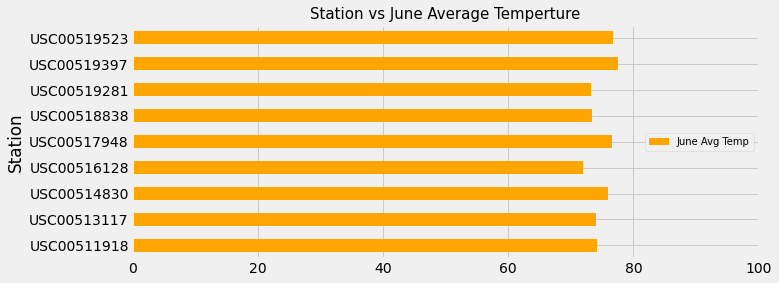

In [19]:
june_more_df[["Station", "June Avg Temp"]].set_index("Station").plot(kind="barh",figsize=(10,4), align="center",color="orange")
plt.xlim(0, 100)
plt.legend(fontsize= 10, loc="center right")
plt.title("Station vs June Average Temperture", fontsize = 15)
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'Station vs June precipitation')

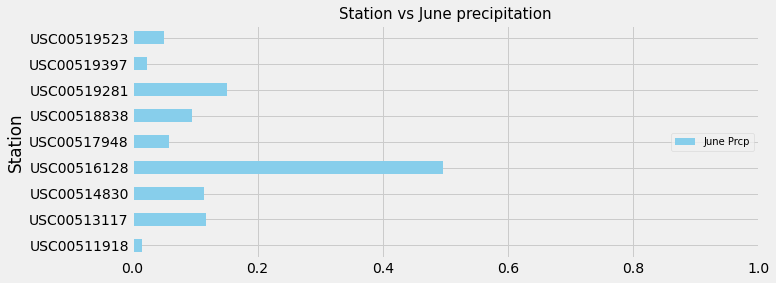

In [27]:
june_more_df[["Station", "June Prcp"]].set_index("Station").plot(kind="barh",figsize=(10,4), align="center",color="skyblue")
plt.xlim(0, 1)
plt.legend(fontsize= 10, loc="center right")
plt.title("Station vs June precipitation", fontsize = 15)
# plt.tight_layout()

In [20]:
# Get average June precipitation(prcp) and December temperture of each station.
# Get min and max temp in December for each station.
dec_more = session.query(Measurement.station, func.avg(Measurement.prcp), func.avg(Measurement.tobs), 
                          func.min(Measurement.tobs),func.max(Measurement.tobs)).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

dec_more

[('USC00511918', 0.13814569536423846, 69.6842105263158, 57.0, 81.0),
 ('USC00513117', 0.20324074074074094, 71.06944444444444, 63.0, 80.0),
 ('USC00514830', 0.15496598639455791, 73.2247191011236, 62.0, 79.0),
 ('USC00516128', 0.5070050761421321, 69.29126213592232, 60.0, 83.0),
 ('USC00517948', 0.15272727272727266, 71.8348623853211, 64.0, 82.0),
 ('USC00518838', 0.6381818181818182, 72.42105263157895, 63.0, 78.0),
 ('USC00519281', 0.2449308755760371, 69.90322580645162, 58.0, 79.0),
 ('USC00519397', 0.07531400966183568, 71.10952380952381, 56.0, 77.0),
 ('USC00519523', 0.1620098039215687, 72.43333333333334, 56.0, 79.0)]

In [21]:
dec_more_df = pd.DataFrame(dec_more, columns=['Station', 'Dec Prcp', 'Dec Avg Temp', 'Dec Min Temp', 'Dec Max Temp'])
dec_more_df.head(30)

,Station,Dec Prcp,Dec Avg Temp,Dec Min Temp,Dec Max Temp
0,USC00511918,0.138146,69.684211,57.0,81.0
1,USC00513117,0.203241,71.069444,63.0,80.0
2,USC00514830,0.154966,73.224719,62.0,79.0
3,USC00516128,0.507005,69.291262,60.0,83.0
4,USC00517948,0.152727,71.834862,64.0,82.0
5,USC00518838,0.638182,72.421053,63.0,78.0
6,USC00519281,0.244931,69.903226,58.0,79.0
7,USC00519397,0.075314,71.109524,56.0,77.0
8,USC00519523,0.162010,72.433333,56.0,79.0


In [30]:
dec_more_df.describe()

,Dec Prcp,Dec Avg Temp,Dec Min Temp,Dec Max Temp
count,9.000000,9.000000,9.000000,9.000000
mean,0.252947,71.219070,59.888889,79.777778
std,0.189780,1.376549,3.218868,1.922094
min,0.075314,69.291262,56.000000,77.000000
25%,0.152727,69.903226,57.000000,79.000000
50%,0.162010,71.109524,60.000000,79.000000
75%,0.244931,72.421053,63.000000,81.000000
max,0.638182,73.224719,64.000000,83.000000


In [22]:
dec_more_df.set_index(dec_more_df['Station'], inplace=True)

Text(0.5, 1.0, 'Station vs Dec Average Temperture')

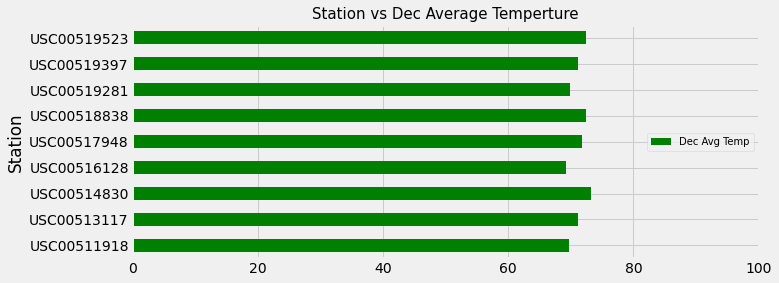

In [23]:
dec_more_df[["Station", "Dec Avg Temp"]].set_index("Station").plot(kind="barh",figsize=(10,4), align="center", color="green")
plt.xlim(0, 100)
plt.legend(fontsize= 10, loc="center right")
plt.title("Station vs Dec Average Temperture", fontsize = 15)
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'Station vs Dec Precipitation')

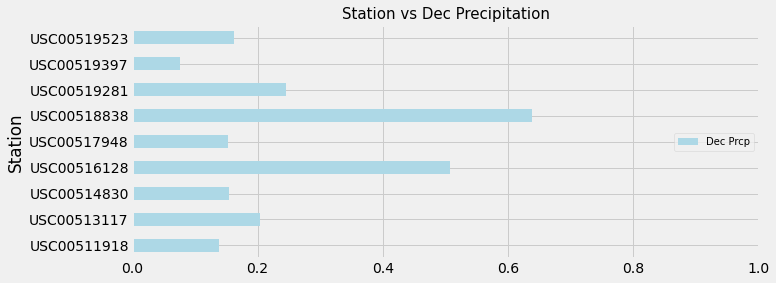

In [29]:
dec_more_df[["Station", "Dec Prcp"]].set_index("Station").plot(kind="barh",figsize=(10,4), align="center", color="lightblue")
plt.xlim(0, 1)
plt.legend(fontsize= 10, loc="center right")
plt.title("Station vs Dec Precipitation", fontsize = 15)
# plt.tight_layout()
# plt.show()